# Submission Dicoding NLP

## About this dataset

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

Feel free to [download dataset]( https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews) from Kaggle

### Citation

Alam, M. H., Ryu, W.-J., Lee, S., 2016. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences 339, 206–223.

# Get the dataset

We'll use the opendatasets library to download the data from Kaggle directly within Jupyter. Let's install and import opendatasets.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.version()

'0.1.20'

The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [4]:
dataset_url = 'https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews'

In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: salmanalshahab
Your Kaggle Key: ··········


100%|██████████| 5.14M/5.14M [00:00<00:00, 187MB/s]

Once the above command is executed, the dataset is downloaded and extracted to the directory trip-advisor-hotel-reviews

In [6]:
import os

In [7]:
data_dir = './trip-advisor-hotel-reviews'

In [8]:
os.listdir(data_dir)

['tripadvisor_hotel_reviews.csv']

In [9]:
train_csv = data_dir + '/tripadvisor_hotel_reviews.csv'

Let's load the data from *tripadvisor_hotel_reviews.csv* using Pandas.

In [10]:
import pandas as pd

dataset = pd.read_csv(train_csv)

dataset

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


The dataset contains over 20,491 rows and 2 columns. Our Objectives is to create model to predict the value in the colums Rating.

Let's check the data types and missing values in the various columns.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


# Plot Hotel Review Ratings

In [12]:
dataset.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ratings of Hotels')

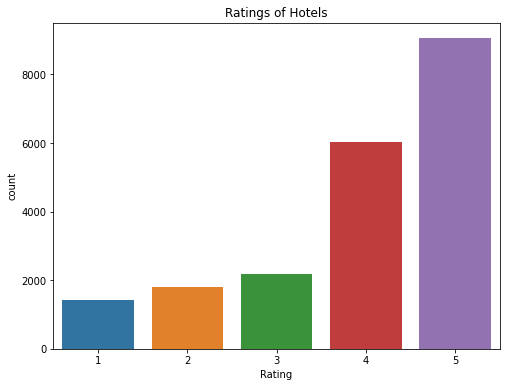

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.countplot(dataset["Rating"])
plt.title("Ratings of Hotels")

# One Hot Encoding Scores Column

For multi-class classifcation using the neural network model, I needed the target variable to be one hot encoded, as the output layer would have 5 nodes, 1 for each score.

In [14]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(dataset[['Rating']]).toarray())

dataset = dataset.join(enc_df)
dataset.head()

,Review,Rating,0,1,2,3,4
0,nice hotel expensive parking got good deal sta...,4,0.0,0.0,0.0,1.0,0.0
1,ok nothing special charge diamond member hilto...,2,0.0,1.0,0.0,0.0,0.0
2,nice rooms not 4* experience hotel monaco seat...,3,0.0,0.0,1.0,0.0,0.0
3,"unique, great stay, wonderful time hotel monac...",5,0.0,0.0,0.0,0.0,1.0
4,"great stay great stay, went seahawk game aweso...",5,0.0,0.0,0.0,0.0,1.0


In [15]:
dataset_new = dataset.drop(columns='Rating')
dataset_new.head()

,Review,0,1,2,3,4
0,nice hotel expensive parking got good deal sta...,0.0,0.0,0.0,1.0,0.0
1,ok nothing special charge diamond member hilto...,0.0,1.0,0.0,0.0,0.0
2,nice rooms not 4* experience hotel monaco seat...,0.0,0.0,1.0,0.0,0.0
3,"unique, great stay, wonderful time hotel monac...",0.0,0.0,0.0,0.0,1.0
4,"great stay great stay, went seahawk game aweso...",0.0,0.0,0.0,0.0,1.0


In [16]:
dataset_new = dataset_new.rename(columns={0: "Rating_1", 1: "Rating_2", 2: "Rating_3", 3: "Rating_4", 4: "Rating_5"})

In [17]:
dataset_new.head()

,Review,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
0,nice hotel expensive parking got good deal sta...,0.0,0.0,0.0,1.0,0.0
1,ok nothing special charge diamond member hilto...,0.0,1.0,0.0,0.0,0.0
2,nice rooms not 4* experience hotel monaco seat...,0.0,0.0,1.0,0.0,0.0
3,"unique, great stay, wonderful time hotel monac...",0.0,0.0,0.0,0.0,1.0
4,"great stay great stay, went seahawk game aweso...",0.0,0.0,0.0,0.0,1.0


Cleaning Text Data

In [74]:
# function for cleaning Review
def standardize_text(df, field):
    df[field] = df[field].str.replace(r"http\S+", "")
    df[field] = df[field].str.replace(r"http","")
    df[field] = df[field].str.replace(r"@/S+","")
    df[field] = df[field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.lower()
    return df

In [75]:
dataset_new = standardize_text(dataset_new, "Review")
dataset_new.head()

,Review,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
0,nice hotel expensive parking got good deal sta...,0.0,0.0,0.0,1.0,0.0
1,ok nothing special charge diamond member hilto...,0.0,1.0,0.0,0.0,0.0
2,nice rooms not 4 experience hotel monaco seat...,0.0,0.0,1.0,0.0,0.0
3,"unique, great stay, wonderful time hotel monac...",0.0,0.0,0.0,0.0,1.0
4,"great stay great stay, went seahawk game aweso...",0.0,0.0,0.0,0.0,1.0


Get Training and Testing dataset with split data become 80 percent and 20 percent respectively

In [76]:
reviews = dataset_new['Review']
ratings = dataset_new[['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']]

In [77]:
from sklearn.model_selection import train_test_split

training_reviews, testing_reviews, training_ratings, testing_ratings = train_test_split(reviews, ratings, test_size=0.2)


# Tokenizing text and creating sequences for sentences

Now you will tokenize text and create sequences for sentences as the first stage of preparing text for use with TensorFlow models.

In [85]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [89]:
# Define variables first to make easier tokenization
vocab_size = 3000
max_length = 250
trunc_type = 'post'
padding_type = 'post'
oov_took = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_took, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                                   lower=True, split=' ', char_level=False,)


tokenizer.fit_on_texts(training_reviews)
#tokenizer.fit_on_texts(testing_reviews)

# Sequences will be padded to the length of the longest individual sequence.
training_sequences = tokenizer.texts_to_sequences(training_reviews)
testing_sequences = tokenizer.texts_to_sequences(testing_reviews)


training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type,
                       truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

Head [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) if you’d like to check out the full TensorFlow documentation for *Tokenizer*.

Head [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) if you’d like to check out the full TensorFlow documentation for *pad_sequences*.



## Train a Model with Embeddings and Bidirectional LSTM

In [90]:
# Build a basic reviews network
# Note the embedding layer is first

# Define embedding dimension as variable
embedding_dim = 16 

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, 
                                                       return_sequences=True)), 
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)), 
                             tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                                   activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                                   activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(5, activation='softmax')
])

If you want to learn more on why word embeddings are used in NLP, check out this [useful post](https://towardsdatascience.com/why-do-we-use-embeddings-in-nlp-2f20e1b632d2).



Tensorflow Documentation:


[1] [Word Embedding](https://www.tensorflow.org/text/guide/word_embeddings)



[2] [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

In [91]:
# Compile function
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 250, 16)           48000     
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 250, 1024)         2166784   
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 512)               2623488   
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)             

In [93]:
# callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [94]:
num_epochs = 30
history = model.fit(training_padded, training_ratings, epochs=num_epochs, batch_size=128, validation_data=(testing_padded, testing_ratings), callbacks=[callback], verbose=2)

Epoch 1/30
129/129 - 117s - loss: 1.7028 - accuracy: 0.4300 - val_loss: 1.4337 - val_accuracy: 0.4274
Epoch 2/30
129/129 - 108s - loss: 1.2969 - accuracy: 0.4632 - val_loss: 1.2117 - val_accuracy: 0.4704
Epoch 3/30
129/129 - 108s - loss: 1.1474 - accuracy: 0.5009 - val_loss: 1.1436 - val_accuracy: 0.5013
Epoch 4/30
129/129 - 108s - loss: 1.0889 - accuracy: 0.5176 - val_loss: 1.1574 - val_accuracy: 0.4904
Epoch 5/30
129/129 - 108s - loss: 1.0579 - accuracy: 0.5313 - val_loss: 1.1195 - val_accuracy: 0.5055
Epoch 6/30
129/129 - 108s - loss: 1.0299 - accuracy: 0.5454 - val_loss: 1.1244 - val_accuracy: 0.5040
Epoch 7/30
129/129 - 108s - loss: 1.0156 - accuracy: 0.5569 - val_loss: 1.1233 - val_accuracy: 0.5006
Epoch 8/30
129/129 - 108s - loss: 1.0123 - accuracy: 0.5589 - val_loss: 1.1208 - val_accuracy: 0.5265
Epoch 9/30
129/129 - 108s - loss: 0.9987 - accuracy: 0.5673 - val_loss: 1.1157 - val_accuracy: 0.5299
Epoch 10/30
129/129 - 108s - loss: 0.9839 - accuracy: 0.5806 - val_loss: 1.1228 - 

# Plot the accuracy and loss

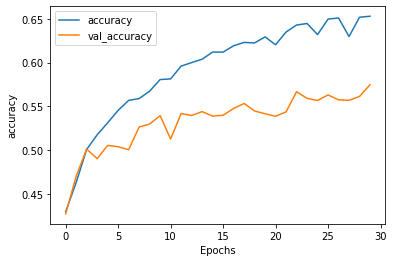

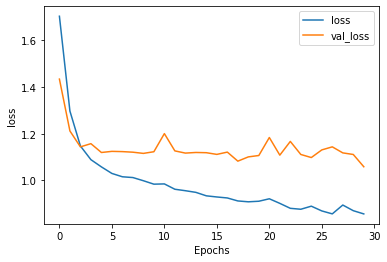

In [95]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
